In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from datetime import date

sns.set_style('darkgrid')

In [2]:
df = pd.read_csv('HRDataset.csv')
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,...,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30
0,"Brown, Mia",1.103024e+09,1.0,1.0,0.0,1.0,1.0,3.0,1.0,28.50,...,Admin Offices,Brandon R. LeBlanc,1.0,Diversity Job Fair,Fully Meets,2.04,2.0,6.0,1/15/2019,0.0
1,"LaRotonda, William",1.106027e+09,0.0,2.0,1.0,1.0,1.0,3.0,0.0,23.00,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,4.0,4.0,1/17/2019,0.0
2,"Steans, Tyrone",1.302053e+09,0.0,0.0,1.0,1.0,1.0,3.0,0.0,29.00,...,Admin Offices,Brandon R. LeBlanc,1.0,Internet Search,Fully Meets,3.90,5.0,5.0,1/18/2019,0.0
3,"Howard, Estelle",1.211051e+09,1.0,1.0,0.0,1.0,1.0,3.0,0.0,21.50,...,Admin Offices,Brandon R. LeBlanc,1.0,Pay Per Click - Google,Fully Meets,3.24,3.0,4.0,NaN,NaN
4,"Singh, Nan",1.307060e+09,0.0,0.0,0.0,1.0,1.0,3.0,0.0,16.56,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,3.0,5.0,1/15/2019,0.0


,DateofTermination,DOB,DateofHire
0,NaT,1987-11-24,2008-10-27
1,NaT,1984-04-26,2014-01-06
2,NaT,1986-09-01,2014-09-29
3,2015-04-15,1985-09-16,2015-02-16
4,NaT,1988-05-19,2015-05-01


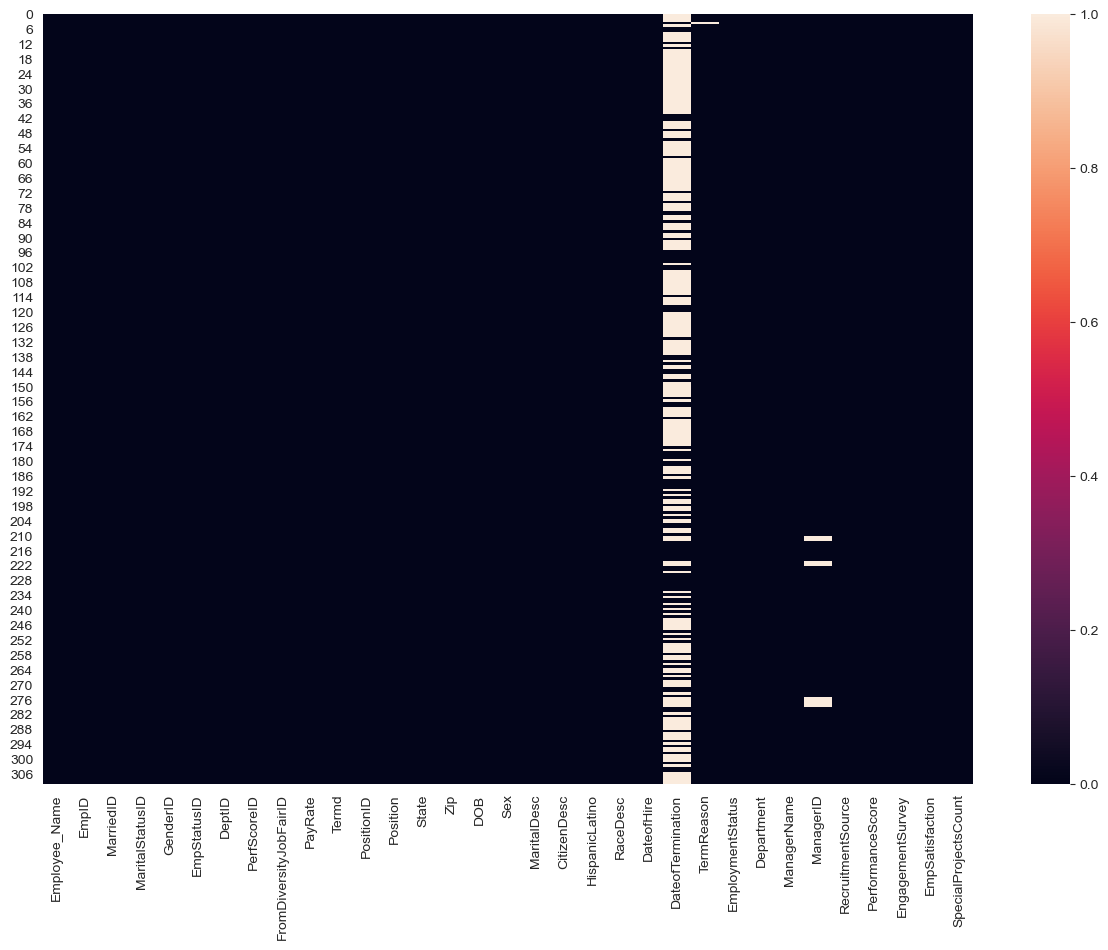

In [3]:
df.drop(['LastPerformanceReview_Date','DaysLateLast30'],axis=1,inplace=True)
df.dropna(thresh=2,inplace=True)
df['DOB'] = pd.to_datetime(df['DOB'],format='%m/%d/%y')

# Funkcja potrzeba do niepoprawnej konwersji lat przed 1970 roku. Orgin, unit itp nie działało. 
# Rozwiązanie znaleziono na stackoverflow.com :)

def days_of_future_past(date,chk_y=pd.Timestamp.today().year):
    return date.replace(year=date.year-100) if date.year > chk_y else date
df['DOB'] = pd.to_datetime(df['DOB'],format='%m/%d/%y').map(days_of_future_past)

# Koniec funkcji 

df['DateofTermination'] = pd.to_datetime(df['DateofTermination'],format='%m/%d/%y')
df['DateofHire'] = pd.to_datetime(df['DateofHire'],format='%m/%d/%Y')

plt.figure(figsize=(15,10))
sns.heatmap(df.isnull())

df[['DateofTermination','DOB','DateofHire']].head()

<AxesSubplot:xlabel='count', ylabel='PerformanceScore'>

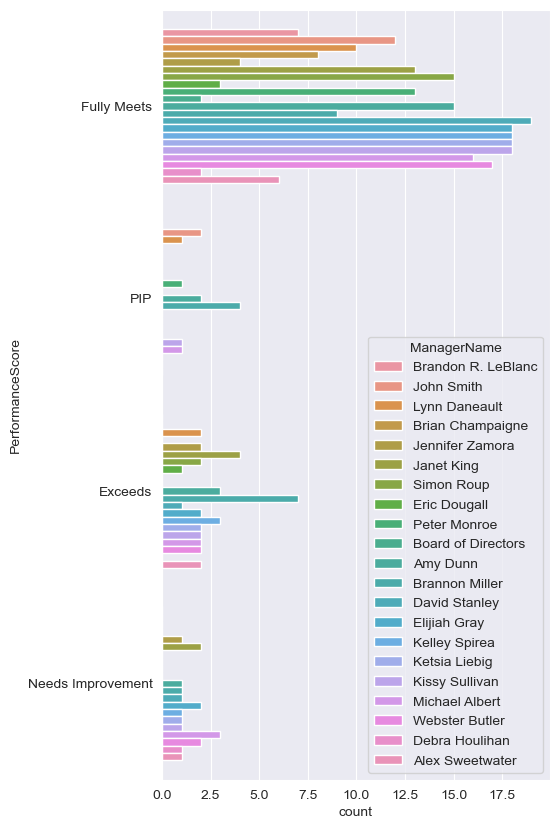

In [4]:
plt.figure(figsize=(5,10))
sns.countplot(y='PerformanceScore', hue='ManagerName', data=df)

Nie widać większych zależności.

In [5]:
import datetime as dt

def count_seniority(row):

    if pd.isnull(row['DateofTermination']):
        end_date = dt.datetime(2019,9,27)
    else:
        end_date = row['DateofTermination']

    return (end_date - row['DateofHire'])/np.timedelta64(1,'Y')

df['Seniority'] = df.apply(lambda row: count_seniority(row),axis=1)

<Figure size 1000x2000 with 0 Axes>

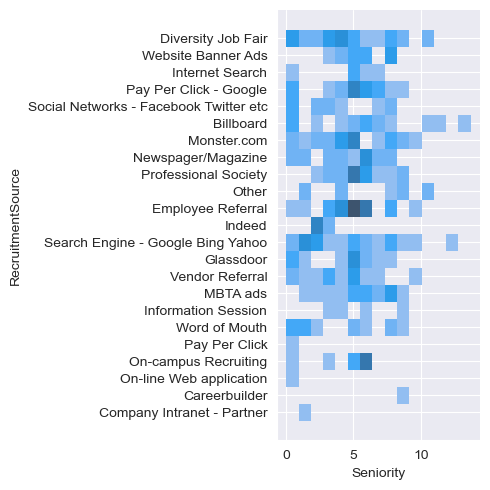

In [6]:
plt.figure(figsize=(10,20))
sns.displot(x='Seniority', y='RecruitmentSource', data=df)

Osoby z najwiekszym stażem pracy (powyżej 10 lat) zostały rekrutowane poprzez bilbordy, wyszukiwarkę internetową oraz targi pracy.

<AxesSubplot:xlabel='MaritalDesc', ylabel='count'>

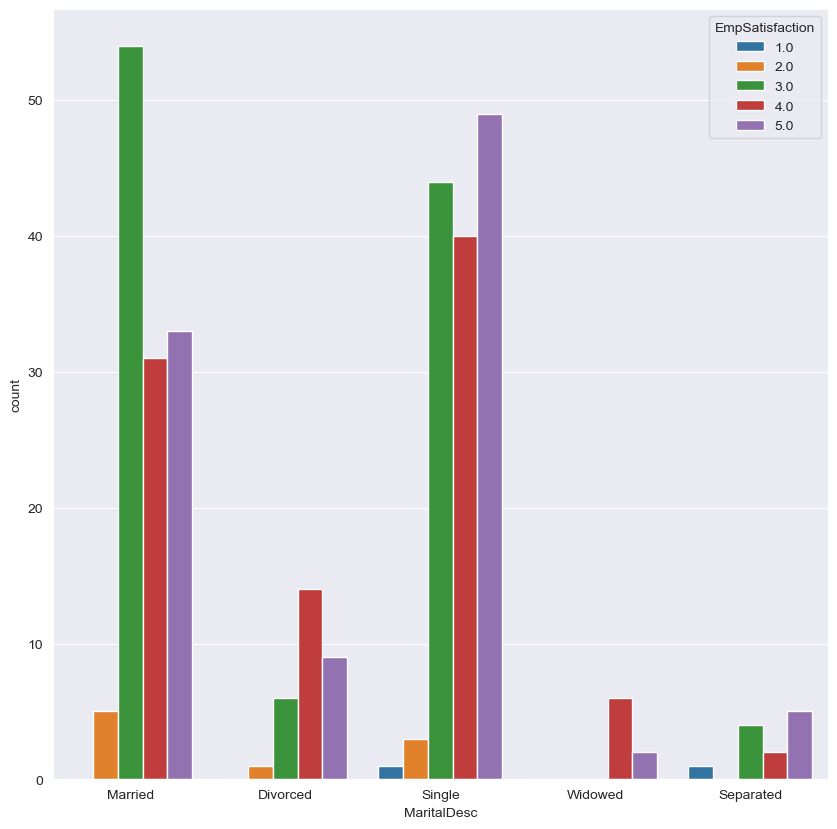

In [20]:
plt.figure(figsize=(10,10))
sns.countplot(x='MaritalDesc', hue='EmpSatisfaction', data=df)

Nie można jasno stwierdzić że stan cywilny wpływa na zadowolenie z pracy.

<AxesSubplot:xlabel='Age', ylabel='count'>

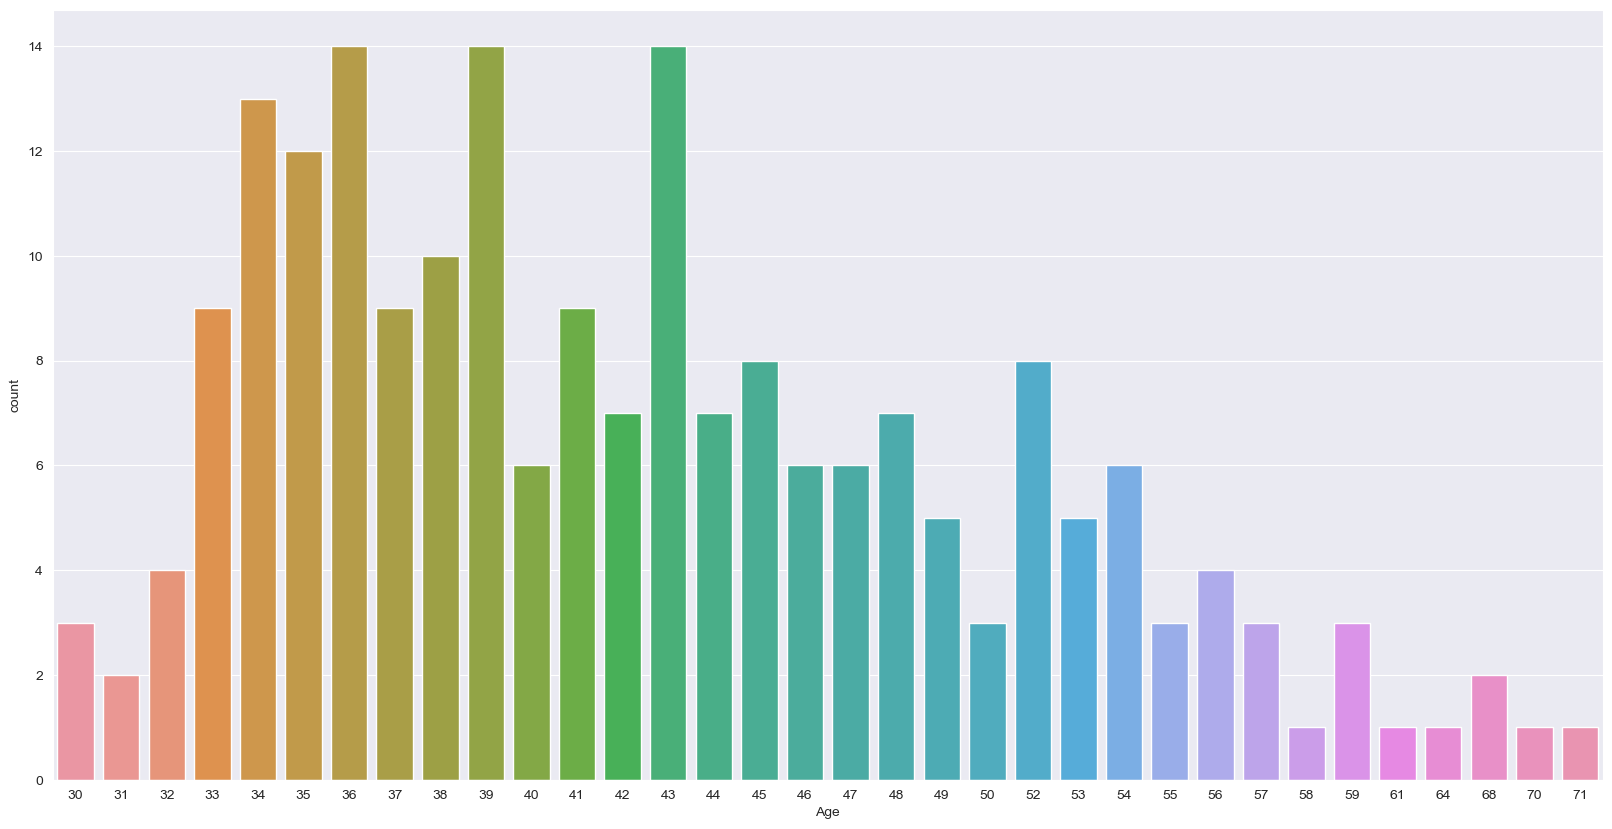

In [7]:
df2 = df[df['Termd'] == 0]
df2 = df2.copy()

def calculate_age(row):
    today = date.today()
    return today.year - row.year

df2['Age'] = df['DOB'].apply(calculate_age)

plt.figure(figsize=(20,10))
sns.countplot(x='Age', data=df2)

<AxesSubplot:xlabel='Age', ylabel='SpecialProjectsCount'>

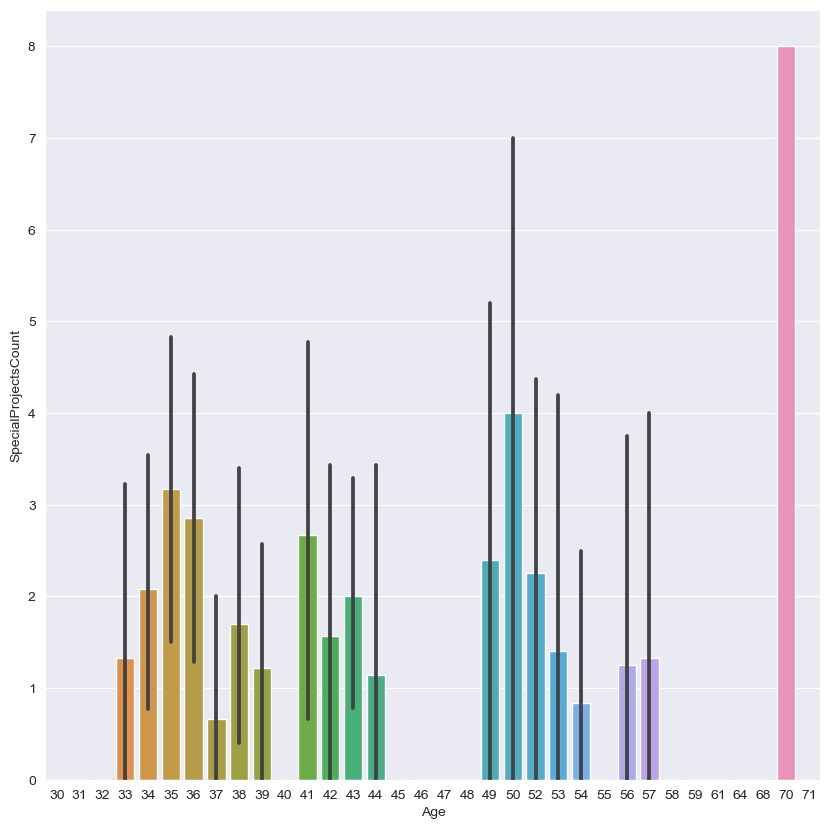

In [13]:
df2 = df2[df2['Age']>0]

plt.figure(figsize=(10,10))
sns.barplot(x='Age', y='SpecialProjectsCount', data=df2)

Z otrzymanyego wykresu wynika że najstarsi pracownicy otrzymali wiecej projektów specjalnych. 
Niestety nie ma podanych dat kiedy je otrzymali, wiec nie można stwierdzić czy wiek wpływa na przydzielane projekty. Możliwe że otrzymali je w pierwszych latach pracy kiedy byli młodsi. Dane muszą podlegać dalszej analizie.

<Figure size 1000x500 with 0 Axes>

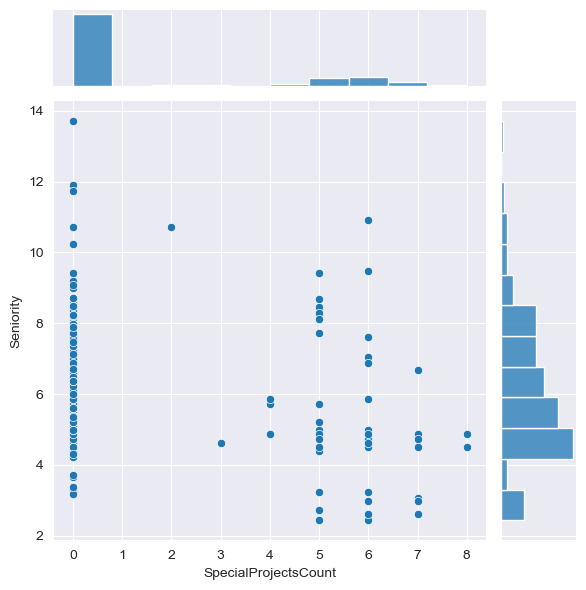

In [14]:
plt.figure(figsize=(10,5))
sns.jointplot(x='SpecialProjectsCount', y='Seniority', data=df2)

Na powyższym wykresie można zaobserwować że większosć projektów specjalnych wykonywanych jest przez pracowników ze stażem pracy mniejszym niż 10 lat.

<AxesSubplot:xlabel='Age', ylabel='SpecialProjectsCount'>

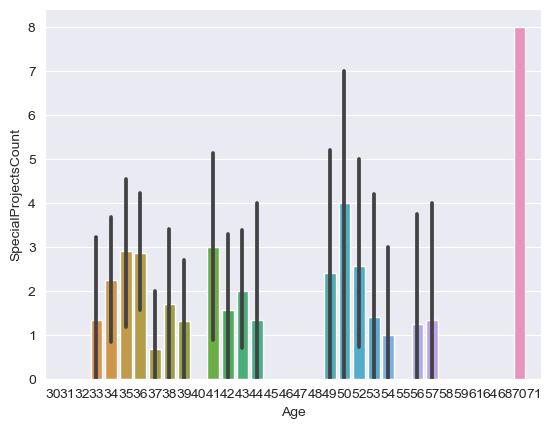

In [17]:
df3 = df2[(df2['Seniority'] < 10) & (df2['Seniority'] > 1)]
df3
sns.barplot(x='Age', y='SpecialProjectsCount', data=df3)

Wsród pracowników ze stażem pomiędzy 1 a 10 lat najwiecej projektów specjalnych otrzymują osoby w wieku 70 lat